In [75]:
import geopandas as gps
import pandas as pd

google_data = pd.concat([pd.DataFrame(i, index=[0])
           for i in
           pd.read_json("http://37.252.189.154:9090/api/dailies")['searches']],
          ignore_index=True)

regions = pd.DataFrame({"region": ["Burgenland",
                                   "Kärnten",
                                   "Niederösterreich",
                                   "Oberösterreich",
                                   "Salzburg",
                                   "Steiermark",
                                   "Tirol",
                                   "Vorarlberg",
                                   "Wien",
                                   ],
                        "region_id": [1,
                                      2,
                                      3,
                                      4,
                                      5,
                                      6,
                                      7,
                                      8,
                                      9
                                   ]})


google_data.date = pd.to_datetime(google_data.date,format="%Y-%m-%d")
google_data = google_data.merge(regions,left_on="region_id",right_on="region_id")


gdf = gps.GeoDataFrame.from_file("geodata/VGD_Österreich_gen_250.shp")

In [76]:
gdf.head()

,ST_KZ,FL,MERIDIAN,GKZ,BKZ,FA_NR,BL_KZ,KG_NR,KG,PG,PB,FA,GB_KZ,GB,VA_NR,VA,BL,ST,geometry
0,1,25559609,31,20804,208,57.0,2.0,76222,Trögern,Eisenkappel-Vellach,Völkermarkt,Klagenfurt,762,Eisenkappel,76,Völkermarkt,Kärnten,Österreich,"POLYGON ((488292.183 285050.700, 488846.056 28..."
1,1,22226607,31,20804,208,57.0,2.0,76218,Remschenig,Eisenkappel-Vellach,Völkermarkt,Klagenfurt,762,Eisenkappel,76,Völkermarkt,Kärnten,Österreich,"POLYGON ((497147.603 287018.028, 497719.621 28..."
2,1,38553914,31,20804,208,57.0,2.0,76203,Bad Vellach,Eisenkappel-Vellach,Völkermarkt,Klagenfurt,762,Eisenkappel,76,Völkermarkt,Kärnten,Österreich,"POLYGON ((496371.181 287773.327, 496480.337 28..."
3,1,33186295,31,20441,204,57.0,2.0,72022,Zell im Winkel,Zell,Klagenfurt Land,Klagenfurt,720,Ferlach,72,Klagenfurt,Kärnten,Österreich,"POLYGON ((475525.975 287675.401, 476665.268 28..."
4,1,20053438,31,20405,204,57.0,2.0,72009,Loiblthal,Ferlach,Klagenfurt Land,Klagenfurt,720,Ferlach,72,Klagenfurt,Kärnten,Österreich,"POLYGON ((471550.798 287922.432, 471510.474 28..."


In [111]:
google_data.head()
data = google_data

In [115]:
grouped = data.groupby(["region","title"]).sum().unstack("region")
grouped.reset_index()
grouped.

title      place                                          \
region                    Burgenland Kärnten Niederösterreich Oberösterreich   
0                  amazon        7.0     5.0              2.0           11.0   
1                 bergfex        NaN     NaN              NaN            NaN   
2                  corona        NaN     NaN              NaN            NaN   
3                facebook        9.0     7.0              3.0           12.0   
4                  google        NaN     3.0              3.0            5.0   
5             graz wetter        NaN     NaN              NaN            NaN   
6                   heute        NaN     NaN              4.0            NaN   
7               innsbruck        NaN     NaN              NaN            NaN   
8                   krone        3.0     4.0              9.0            NaN   
9                     orf        5.0     6.0              8.0            5.0   
10               salzburg        NaN     NaN              NaN            NaN   
11          todesanzeigen        NaN     NaN              NaN            NaN   
12            trauerhilfe        NaN     NaN              NaN            NaN   
13                     tt        NaN     NaN              NaN            NaN   
14              viternity        4.0     NaN              NaN            NaN   
15                    vol        NaN     NaN              NaN            NaN   
16                 vol.at        NaN     NaN              NaN            NaN   
17                 wetter        0.0     0.0              0.0            0.0   
18        wetter dornbirn        NaN     NaN              NaN            NaN   
19      wetter klagenfurt        NaN     2.0              NaN            NaN   
20          wetter morgen        NaN     6.0              NaN            NaN   
21        wetter salzburg        NaN     NaN              NaN            NaN   
22           wetter tirol        NaN     NaN              NaN            NaN   
23            wetter wien        NaN     NaN              NaN            NaN   
24            wien wetter        NaN     NaN              NaN            NaN   
25              willhaben        9.0     4.0             11.0            3.0   
26                youtube        3.0     3.0              NaN            4.0   

                                                   region_id          \
region Salzburg Steiermark Tirol Vorarlberg  Wien Burgenland Kärnten   
0           NaN        8.0   7.0        2.0   NaN        2.0     4.0   
1           NaN        3.0   NaN        NaN   NaN        NaN     NaN   
2           NaN        NaN   NaN        NaN   2.0        NaN     NaN   
3           4.0        3.0   NaN        8.0   7.0        3.0     6.0   
4           7.0        7.0   2.0        9.0  11.0        NaN     2.0   
5           NaN        1.0   NaN        NaN   NaN        NaN     NaN   
6           NaN        NaN   NaN        NaN   NaN        NaN     NaN   
7           NaN        NaN   2.0        NaN   NaN        NaN     NaN   
8           NaN        NaN   NaN        NaN   NaN        2.0     2.0   
9           6.0        4.0   1.0        NaN  10.0        4.0     8.0   
10          0.0        NaN   NaN        NaN   NaN        NaN     NaN   
11          NaN        NaN   NaN        4.0   NaN        NaN     NaN   
12          NaN        NaN   6.0        NaN   NaN        NaN     NaN   
13          NaN        NaN  11.0        NaN   NaN        NaN     NaN   
14          NaN        NaN   NaN        NaN   NaN        1.0     NaN   
15          NaN        NaN   NaN        4.0   NaN        NaN     NaN   
16          NaN        NaN   NaN        6.0   NaN        NaN     NaN   
17          1.0        0.0   0.0        0.0   0.0        4.0     8.0   
18          NaN        NaN   NaN        4.0   NaN        NaN     NaN   
19          NaN        NaN   NaN        NaN   NaN        NaN     2.0   
20          NaN        NaN   NaN        NaN   NaN        NaN     4.0   
21         12.0        NaN   NaN        NaN

<AxesSubplot:ylabel='title'>

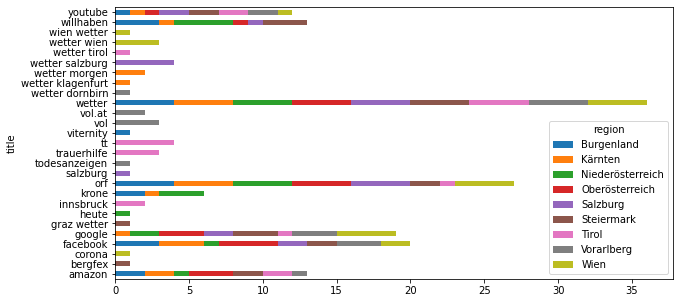

In [97]:
data.groupby(["region","title"]).title.count().unstack("region").fillna(0).plot(kind="barh",stacked=True,figsize=(10,5))

<AxesSubplot:>

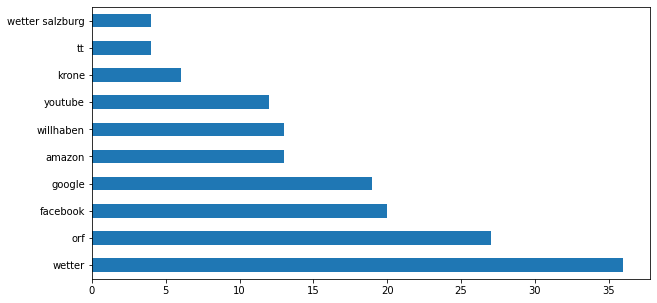

In [79]:
data.title.value_counts().head(10).plot(kind="barh",figsize=(10,5))

In [ ]:

dog = data[data.title == "Haushund"]
counts = dog.region.value_counts()
dogs = pd.DataFrame(counts)
dogmap = gdf.merge(dogs,left_on="BL",right_on=dogs.index, how="outer").fillna(0)
dogmap.plot(column="region", legend=True, cmap='autumn', figsize=(10,5), missing_kwds={'color': 'lightgrey'})

/home/stephan/.local/lib/python3.8/site-packages/geopandas/plotting.py:373: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

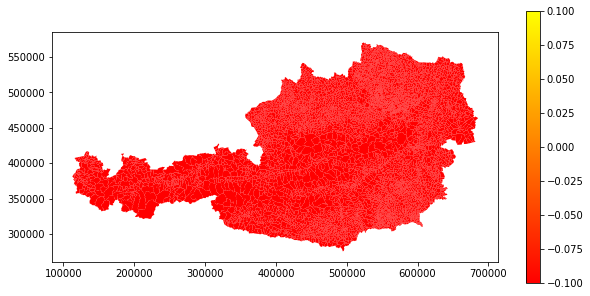

In [13]:
car = data[data.title == "Audi"]
counts = car.region.value_counts()
cars = pd.DataFrame(counts)
carsmap = gdf.merge(cars,left_on="BL",right_on=cars.index, how="outer").fillna(0)
carsmap.plot(column="region", legend=True, cmap='autumn', figsize=(10,5), missing_kwds={'color': 'lightgrey'})

<AxesSubplot:>

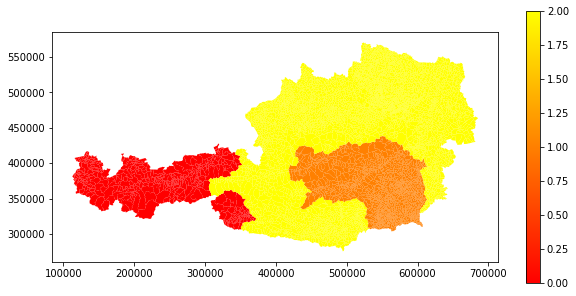

In [64]:
bank = data[data.title == "orf"]
counts = bank.region.value_counts()
bank = pd.DataFrame(counts)
bankMap = gdf.merge(bank,left_on="BL",right_on=bank.index, how="outer").fillna(0)
bankMap.plot(column="region", legend=True, cmap='autumn', figsize=(10,5))